In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df=pd.read_csv('Housing.csv')
Y=df['price']
X=df.drop(['price'],axis=1)
print(X)
print(Y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [101]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['mainroad']=le.fit_transform(X['mainroad'])
X['guestroom']=le.fit_transform(X['guestroom'])
X['basement']=le.fit_transform(X['basement'])
X['hotwaterheating']=le.fit_transform(X['hotwaterheating'])
X['airconditioning']=le.fit_transform(X['airconditioning'])
X['prefarea']=le.fit_transform(X['prefarea'])
X['furnishingstatus']=le.fit_transform(X['furnishingstatus'])

print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_train)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1          0         1   
335  3816         2          1        1         1          0         1   
412  2610         3          1        2         1          0         1   
471  3750         3          1        2         1          0         0   
..    ...       ...        ...      ...       ...        ...       ...   
71   6000         4          2        4         1          0         0   
106  5450         4          2        1         1          0         1   
270  4500         3          2        3         1          0         0   
435  4040         2          1        1         1          0         0   
102  5500         3          2        4         1          1         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
46                 0              

In [103]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [104]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
print(r2_score(Y_test,y_pred))


0.6494754192267803


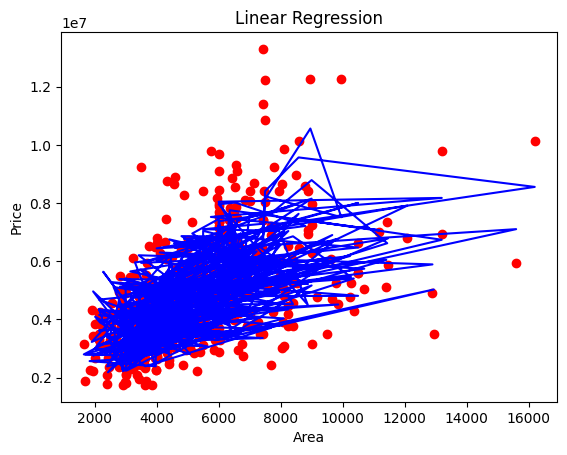

In [105]:
plt.scatter(X['area'],Y,color='red')
plt.plot(X['area'],regressor.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [106]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,Y_train)

LinearRegression()

In [107]:
from sklearn.metrics import r2_score
y_pred=lin_reg2.predict(poly_reg.fit_transform(X_test))
print(r2_score(Y_test,y_pred))

0.5882684435150984


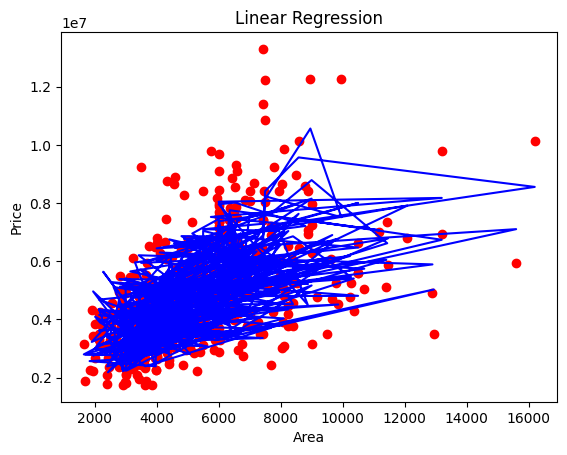

In [108]:
plt.scatter(X['area'],Y,color='red')
plt.plot(X['area'],regressor.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

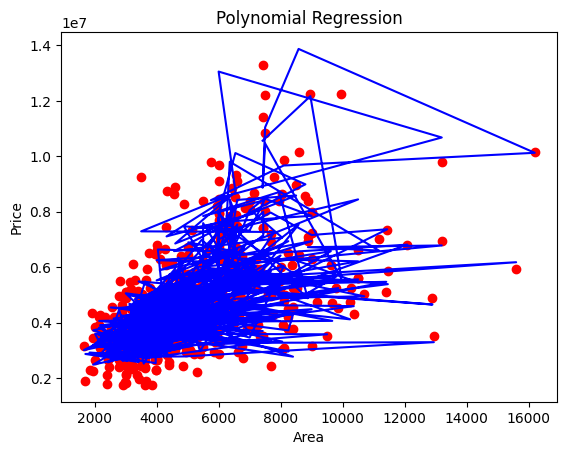

In [109]:
plt.scatter(X['area'],Y,color='red')
plt.plot(X['area'],lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [110]:
svd=pd.read_csv('Housing.csv')
svd

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [111]:
from sklearn.preprocessing import StandardScaler
sa=StandardScaler()
X['basement']=sa.fit_transform(X[['basement']])
X['mainroad']=sa.fit_transform(X[['mainroad']])
X['guestroom']=sa.fit_transform(X[['guestroom']])
X['area']=sa.fit_transform(X[['area']])
X['bedrooms']=sa.fit_transform(X[['bedrooms']])
X['bathrooms']=sa.fit_transform(X[['bathrooms']])
X['stories']=sa.fit_transform(X[['stories']])
X['parking']=sa.fit_transform(X[['parking']])
X['hotwaterheating']=sa.fit_transform(X[['hotwaterheating']])
X['airconditioning']=sa.fit_transform(X[['airconditioning']])
X['prefarea']=sa.fit_transform(X[['prefarea']])
X['furnishingstatus']=sa.fit_transform(X[['furnishingstatus']])
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


In [112]:
Y=sa.fit_transform(Y.values.reshape(-1,1))
Y

array([[ 4.56636513e+00],
       [ 4.00448405e+00],
       [ 4.00448405e+00],
       [ 3.98575468e+00],
       [ 3.55497918e+00],
       [ 3.25530927e+00],
       [ 2.88072189e+00],
       [ 2.88072189e+00],
       [ 2.73088693e+00],
       [ 2.69342819e+00],
       [ 2.69342819e+00],
       [ 2.62974834e+00],
       [ 2.43121702e+00],
       [ 2.39375829e+00],
       [ 2.39375829e+00],
       [ 2.31884081e+00],
       [ 2.31884081e+00],
       [ 2.24392333e+00],
       [ 2.20646459e+00],
       [ 2.18773522e+00],
       [ 2.13154711e+00],
       [ 2.09408838e+00],
       [ 2.07535901e+00],
       [ 2.07535901e+00],
       [ 2.03790027e+00],
       [ 2.01917090e+00],
       [ 1.97796629e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.88806531e+00],
       [ 1.83187721e+00],
       [ 1.79441847e+00],
       [ 1.77351649e+00],
       [ 1.75321385e+00],
       [ 1.71950099e+00],
       [ 1.7

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_train)

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
46   0.391790  0.047278   1.421812  2.532024  0.405623  -0.465315 -0.734539   
93   0.945257  0.047278   1.421812 -0.929397  0.405623  -0.465315  1.361397   
335 -0.615521 -1.308863  -0.570187 -0.929397  0.405623  -0.465315  1.361397   
412 -1.171756  0.047278  -0.570187  0.224410  0.405623  -0.465315  1.361397   
471 -0.645962  0.047278  -0.570187  0.224410  0.405623  -0.465315 -0.734539   
..        ...       ...        ...       ...       ...        ...       ...   
71   0.391790  1.403419   1.421812  2.532024  0.405623  -0.465315 -0.734539   
106  0.138117  1.403419   1.421812 -0.929397  0.405623  -0.465315  1.361397   
270 -0.300045  0.047278   1.421812  1.378217  0.405623  -0.465315 -0.734539   
435 -0.512207 -1.308863  -0.570187 -0.929397  0.405623  -0.465315 -0.734539   
102  0.161178  0.047278   1.421812  2.532024  0.405623   2.149083 -0.734539   

     hotwaterheating  airconditioning   parking  pr

In [114]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [115]:
y_pred=regressor.predict(X_test)
out=sa.inverse_transform(y_pred.reshape(-1,1))
out

array([[4866418.97948945],
       [7974263.66531218],
       [3432646.13301481],
       [4486590.49762529],
       [3960283.20576413],
       [3447353.67053035],
       [4932646.4660757 ],
       [4899984.97726698],
       [3475936.13615145],
       [3196023.78647902],
       [8718935.36896975],
       [2971547.22982161],
       [3273986.54134606],
       [3467796.19254499],
       [3540509.18121446],
       [4792234.75742427],
       [3146014.66612317],
       [4368770.48130671],
       [4137362.45409929],
       [3817616.38016512],
       [6528285.06118034],
       [5819631.22007138],
       [2930124.99363631],
       [4644500.78362139],
       [4322364.76961714],
       [7318282.98035474],
       [4018080.76474189],
       [4452343.52885943],
       [6824895.26376509],
       [3470753.50421775],
       [6346548.7929877 ],
       [3341530.96588144],
       [6322674.92148957],
       [4340362.48396939],
       [2969291.33854053],
       [6049544.90044463],
       [4399603.28202346],
 

In [116]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.6047290773927508


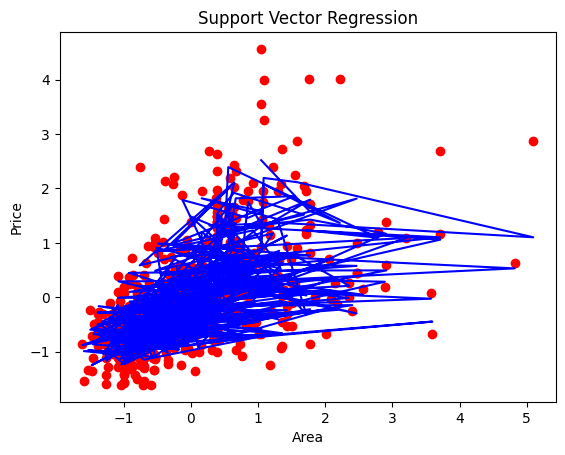

In [117]:
plt.scatter(X['area'],Y,color='red')
plt.plot(X['area'],regressor.predict(X),color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [118]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [119]:
y_pred=regressor.predict(X_test)
out=sa.inverse_transform(y_pred.reshape(-1,1))
out

array([[ 5247095.        ],
       [ 7439950.        ],
       [ 3786658.75      ],
       [ 4529630.        ],
       [ 3792250.        ],
       [ 3513930.        ],
       [ 5088020.        ],
       [ 5269040.        ],
       [ 2566060.        ],
       [ 2892767.5       ],
       [10223109.4       ],
       [ 3350217.5       ],
       [ 2989408.33333333],
       [ 3514420.        ],
       [ 3649555.        ],
       [ 3790710.        ],
       [ 3369926.        ],
       [ 4966570.        ],
       [ 3723020.        ],
       [ 4077255.        ],
       [ 5355980.        ],
       [ 5893860.        ],
       [ 3074761.66666667],
       [ 3665410.        ],
       [ 4782960.        ],
       [ 6481160.        ],
       [ 3139080.        ],
       [ 4705400.        ],
       [ 6566840.        ],
       [ 3274950.        ],
       [ 5762540.        ],
       [ 3154410.        ],
       [ 6918870.        ],
       [ 4333490.        ],
       [ 2984310.        ],
       [ 6150480.   

In [120]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.6090834482546451


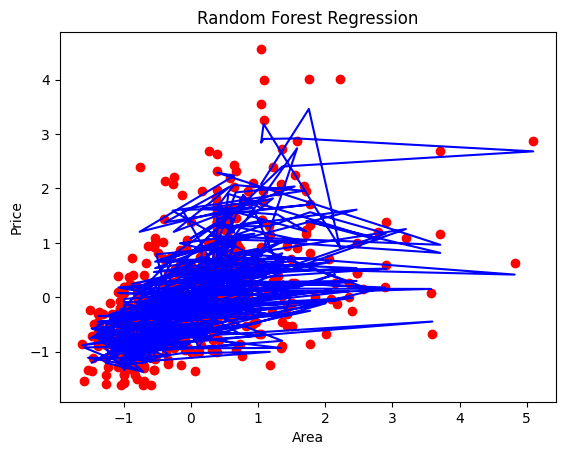

In [121]:
plt.scatter(X['area'],Y,color='red')
plt.plot(X['area'],regressor.predict(X),color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [122]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1)

In [123]:
y_pred=regressor.predict(X_test)
out=sa.inverse_transform(y_pred.reshape(-1,1))
out

array([[ 5600000.],
       [ 7840000.],
       [ 3850000.],
       [ 4935000.],
       [ 2660000.],
       [ 2730000.],
       [ 7070000.],
       [ 4893000.],
       [ 2380000.],
       [ 2940000.],
       [12250000.],
       [ 3255000.],
       [ 2957500.],
       [ 3640000.],
       [ 2653000.],
       [ 4200000.],
       [ 3447500.],
       [ 4270000.],
       [ 3129000.],
       [ 3710000.],
       [ 5810000.],
       [ 6020000.],
       [ 2957500.],
       [ 3633000.],
       [ 6020000.],
       [ 6790000.],
       [ 2870000.],
       [ 3885000.],
       [ 7000000.],
       [ 2961000.],
       [ 6615000.],
       [ 2800000.],
       [ 7560000.],
       [ 4235000.],
       [ 2485000.],
       [ 7350000.],
       [ 4900000.],
       [ 4200000.],
       [ 3115000.],
       [ 3885000.],
       [ 3773000.],
       [ 2870000.],
       [ 7840000.],
       [ 4480000.],
       [ 4270000.],
       [ 4200000.],
       [ 7560000.],
       [ 4480000.],
       [ 3087000.],
       [ 3430000.],


In [124]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.3993043267623173


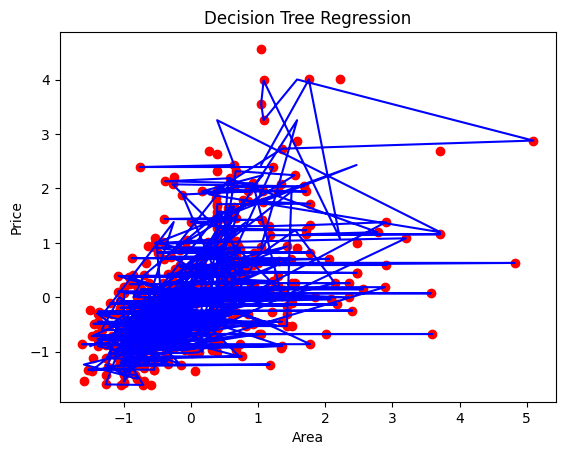

In [125]:
plt.scatter(X['area'],Y,color='red')
plt.plot(X['area'],regressor.predict(X),color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()
#

In [126]:
x=df['area']
y=df['price']
x

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)
print(X_train)

542     3620
496     4000
484     3040
507     3600
252     9860
       ...  
70      4000
277    10360
9       5750
359     3600
192     6600
Name: area, Length: 436, dtype: int64


In [128]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(np.array(X_train).reshape(-1,1), Y_train)

LinearRegression()

In [129]:
y_pred=regressor.predict(np.array(X_test).reshape(-1,1))
y_pred

array([4230316.29633974, 6901321.58923638, 3973671.65965572,
       8602780.47688228, 4068725.22879795, 5347195.73376093,
       4159026.11948306, 3983177.01656994, 3998385.5876327 ,
       6606655.52489547, 5180851.98776203, 4211305.58251129,
       3968918.98119861, 5209368.0585047 , 5173722.97007636,
       3484145.77857324, 4658057.35747977, 5190357.34467625,
       3802575.2351997 , 4467950.21919531, 6202677.85604099,
       5394722.51833204, 4705584.14205088, 3137200.2512041 ,
       5380464.48296071, 3826338.62748526, 5656119.83347317,
       5028766.27713446, 3897628.80434193, 5380464.48296071,
       4420423.43462419, 3410479.26248801, 6321494.81746878,
       4249327.01016818, 3812080.59211393, 5389969.83987493,
       5180851.98776203, 3772158.09307419, 3968918.98119861,
       3362952.47791689, 6369021.60203989, 5133325.20319091,
       5085798.4186198 , 4940841.7256779 , 4002187.73039838,
       5180851.98776203, 4306359.15165352, 4249327.01016818,
       4252178.61724245,

In [130]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_pred))

0.3067292122216637


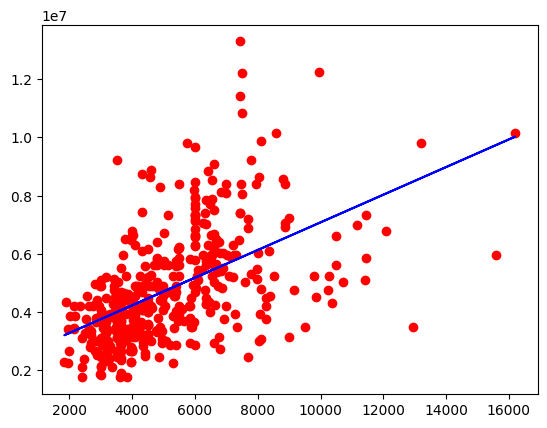

In [131]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(np.array(X_train).reshape(-1,1)),color='blue')